In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import cv2

In [5]:
from sklearn.metrics import jaccard_score

In [6]:
from pathlib import Path

In [7]:
targets_path = list(Path("/home/mrafaat/AliThesis/logs/semantic_kitti/lidar/MONTH_11_DAY_22_HOUR_02_MIN_43_SEC_46/targets/08/").rglob("*.npy"))

In [8]:
lidar_path = list(Path("/home/mrafaat/AliThesis/logs/semantic_kitti/lidar/MONTH_11_DAY_22_HOUR_02_MIN_43_SEC_46/predictions/08/").rglob("*.npy"))

In [9]:
early_path = list(Path("/home/mrafaat/AliThesis/logs/semantic_kitti/earlyfusion/MONTH_12_DAY_02_HOUR_06_MIN_51_SEC_52/predictions/").rglob("*.npy"))

In [10]:
middle_path = list(Path("/home/mrafaat/AliThesis/logs/semantic_kitti/middlefusion/MONTH_12_DAY_02_HOUR_06_MIN_56_SEC_17/predictions/").rglob("*.npy"))

In [11]:
late_path = list(Path("/home/mrafaat/AliThesis/logs/semantic_kitti/latefusion/MONTH_12_DAY_02_HOUR_07_MIN_00_SEC_25/predictions/").rglob("*.npy"))

In [12]:
def get_iou(predictions_path, targets_path):
    ious = []
    for preds_f, targets_f in zip(list(predictions_path), list(targets_path)):
        preds = np.load(str(preds_f))
        targets = np.load(str(targets_f))
#         iou = jaccard_score(targets, preds, average='macro')
        iou = jaccard_score(targets, preds, average='weighted')
        ious.append((int(preds_f.stem), iou))
    return sorted(ious, key=lambda x: x[1], reverse=True)
    

In [13]:
def create_df(predictions_path, targets_path, col):
    ious = get_iou(predictions_path=predictions_path, targets_path=targets_path)
    df = pd.DataFrame(ious, columns=["filename", col])
    return df

In [14]:
lidar_df = create_df(predictions_path=lidar_path, targets_path=targets_path, col="lidar")

In [15]:
early_df = create_df(predictions_path=early_path, targets_path=targets_path, col="early")

In [16]:
middle_df = create_df(predictions_path=middle_path, targets_path=targets_path, col="middle")

In [17]:
late_df = create_df(predictions_path=late_path, targets_path=targets_path, col="late")

In [18]:
data = pd.merge(lidar_df, early_df, on="filename")

In [19]:
data = pd.merge(data, middle_df, on="filename")

In [20]:
data = pd.merge(data, late_df, on="filename")

In [21]:
data.head(20)

,filename,lidar,early,middle,late
0,3515,0.975727,0.968963,0.971328,0.977869
1,3491,0.972674,0.974468,0.967739,0.976554
2,3490,0.971801,0.975738,0.971527,0.977913
3,865,0.969522,0.974730,0.967066,0.976899
4,2425,0.969160,0.966737,0.948253,0.958368
5,3492,0.968632,0.968889,0.966203,0.970873
6,3517,0.968585,0.965873,0.961655,0.977237
7,3134,0.968153,0.962183,0.957998,0.962868
8,863,0.966835,0.940296,0.966658,0.933114
9,3516,0.966385,0.964139,0.966717,0.974278


In [22]:
image_path = "/home/mrafaat/SemanticKitti/dataset/sequences/08/image_2/002288.png"

In [23]:
image = cv2.imread(image_path)

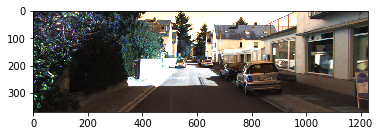

In [24]:
plt.imshow(image)

In [25]:
images_paths = list(Path("/home/mrafaat/SemanticKitti/dataset/sequences/08/image_2").glob("*.png"))

In [26]:
images_paths = sorted(images_paths, key=lambda x: int(x.stem))

In [27]:
from tqdm import tqdm

In [28]:
def write_text(im, t):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(im, t, (0,30), font, 1, (0, 0, 255), 6, cv2.LINE_AA)
    return im.astype(np.uint8)

In [29]:
images = []
for image_f in tqdm(images_paths):
    im = cv2.imread(str(image_f))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    filename = int(image_f.stem)
    Lidar = data.loc[data["filename"] == filename, "lidar"].values[0]
    Early = data.loc[data["filename"] == filename, "early"].values[0]
    Middle = data.loc[data["filename"] == filename, "middle"].values[0]
    Late = data.loc[data["filename"] == filename, "late"].values[0]
    text = f"file: {filename} Lidar: {Lidar:.3f} Early: {Early:.3f} Middle: {Middle:.3f} Late: {Late:.3f}"
    im = write_text(im, text)
    cv2.imwrite(f"{str(filename)}.png", im)

100%|██████████| 4071/4071 [02:57<00:00, 22.93it/s]


In [30]:
import moviepy.video.io.ImageSequenceClip

In [31]:
images_paths = list(Path(".").glob("*.png"))

In [32]:
images_paths = sorted(images_paths, key=lambda x: int(x.stem))

In [33]:
images_paths

[PosixPath('0.png'),
 PosixPath('1.png'),
 PosixPath('2.png'),
 PosixPath('3.png'),
 PosixPath('4.png'),
 PosixPath('5.png'),
 PosixPath('6.png'),
 PosixPath('7.png'),
 PosixPath('8.png'),
 PosixPath('9.png'),
 PosixPath('10.png'),
 PosixPath('11.png'),
 PosixPath('12.png'),
 PosixPath('13.png'),
 PosixPath('14.png'),
 PosixPath('15.png'),
 PosixPath('16.png'),
 PosixPath('17.png'),
 PosixPath('18.png'),
 PosixPath('19.png'),
 PosixPath('20.png'),
 PosixPath('21.png'),
 PosixPath('22.png'),
 PosixPath('23.png'),
 PosixPath('24.png'),
 PosixPath('25.png'),
 PosixPath('26.png'),
 PosixPath('27.png'),
 PosixPath('28.png'),
 PosixPath('29.png'),
 PosixPath('30.png'),
 PosixPath('31.png'),
 PosixPath('32.png'),
 PosixPath('33.png'),
 PosixPath('34.png'),
 PosixPath('35.png'),
 PosixPath('36.png'),
 PosixPath('37.png'),
 PosixPath('38.png'),
 PosixPath('39.png'),
 PosixPath('40.png'),
 PosixPath('41.png'),
 PosixPath('42.png'),
 PosixPath('43.png'),
 PosixPath('44.png'),
 PosixPath('45.png')

In [34]:
images_paths_names = [str(p) for p in images_paths]

In [35]:
images_paths_names

['0.png',
 '1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '55.png',
 '56.png',
 '57.png',
 '58.png',
 '59.png',
 '60.png',
 '61.png',
 '62.png',
 '63.png',
 '64.png',
 '65.png',
 '66.png',
 '67.png',
 '68.png',
 '69.png',
 '70.png',
 '71.png',
 '72.png',
 '73.png',
 '74.png',
 '75.png',
 '76.png',
 '77.png',
 '78.png',
 '79.png',
 '80.png',
 '81.png',
 '82.png',
 '83.png',
 '84.png',
 '85.png',
 '86.png',
 '87.png',
 '88.png',
 '89.png',
 '90.png',
 '91.png'

In [44]:
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(images_paths_names, fps=15)

In [45]:
clip.write_videofile('my_video.mp4')

t:   0%|          | 3/4071 [00:00<02:47, 24.27it/s, now=None]

Moviepy - Building video my_video.mp4.
Moviepy - Writing video my_video.mp4



Moviepy - Done !
Moviepy - video ready my_video.mp4


In [46]:
!pwd

/home/mrafaat/AliThesis/FusionTransformer/notebooks


In [38]:
data["diff"] = data["early"] - data["lidar"]


In [39]:
data.sort_values(by='diff', ascending=False)

,filename,lidar,early,middle,late,diff
4068,2554,0.519064,0.888927,0.546904,0.817376,0.369862
4057,3619,0.584535,0.882272,0.575809,0.814996,0.297737
3977,2415,0.671616,0.952432,0.813269,0.938591,0.280817
4024,4063,0.632411,0.893011,0.673342,0.837696,0.260600
3863,3685,0.720324,0.965805,0.944517,0.960506,0.245480
...,...,...,...,...,...,...
3276,1939,0.803091,0.671444,0.794400,0.764015,-0.131647
668,2338,0.918995,0.767384,0.859188,0.917341,-0.151611
1425,2341,0.894282,0.725891,0.791934,0.801867,-0.168391
55,452,0.958558,0.711484,0.967709,0.747962,-0.247074


In [40]:
data["diff_middle"] = data["middle"] - data["lidar"]

In [41]:
data.sort_values(by='diff_middle', ascending=False)

,filename,lidar,early,middle,late,diff,diff_middle
3863,3685,0.720324,0.965805,0.944517,0.960506,0.245480,0.224192
3944,2655,0.689031,0.734240,0.875488,0.775069,0.045210,0.186457
3466,3272,0.784337,0.954849,0.968801,0.807425,0.170511,0.184464
3185,3684,0.809808,0.959524,0.965582,0.960222,0.149716,0.155774
3973,2874,0.676394,0.787297,0.830145,0.837094,0.110903,0.153751
...,...,...,...,...,...,...,...
3489,3019,0.781256,0.693448,0.634184,0.613896,-0.087808,-0.147073
648,2347,0.919805,0.914292,0.758170,0.910532,-0.005514,-0.161635
3615,2557,0.766738,0.837507,0.586617,0.848465,0.070769,-0.180122
1709,3017,0.884124,0.850831,0.658388,0.839634,-0.033292,-0.225735


In [42]:
data["diff_late"] = data["late"] - data["lidar"]

In [43]:
data.sort_values(by='diff_late', ascending=False)

,filename,lidar,early,middle,late,diff,diff_middle,diff_late
4056,2413,0.584828,0.588141,0.585061,0.918878,0.003313,0.000233,0.334050
4065,2555,0.556078,0.704598,0.557349,0.872100,0.148520,0.001271,0.316022
4068,2554,0.519064,0.888927,0.546904,0.817376,0.369862,0.027840,0.298312
4066,2550,0.537874,0.587203,0.548816,0.806163,0.049329,0.010942,0.268289
3977,2415,0.671616,0.952432,0.813269,0.938591,0.280817,0.141654,0.266976
...,...,...,...,...,...,...,...,...
3138,3012,0.812992,0.812121,0.727803,0.673031,-0.000871,-0.085189,-0.139961
1476,2188,0.892880,0.859785,0.883991,0.731439,-0.033096,-0.008889,-0.161441
3489,3019,0.781256,0.693448,0.634184,0.613896,-0.087808,-0.147073,-0.167360
82,454,0.954215,0.964965,0.951982,0.771795,0.010750,-0.002233,-0.182420
